# Midterm Review <a class='tocSkip'>

## Sang-Yun Oh <a class='tocSkip'>

# [02-Data-and-Uncertainty](02-Data-and-Uncertainty.ipynb)

## Random Variables vs. Data

**Random Variable: $Y$**
- Suppose $Y\sim f(y)$, and $f(y)$ is the density function
- $f(y)$ analytically defines behavior or $Y$

**Data of $Y$: $y_1, y_2, \dots$**
- Each $y_i$ is one (random) observation of $Y$
- In practice, $f(y)$ is not known
- However, we can estimate $\hat f(y)$ from data
- Histogram $\hat f(y)$ can be considered as the empirical distribution of $Y$

**Random Sample**: $Y_1, Y_2, \dots, Y_n$
- $Y_j$ for $j=1,2,\dots,n$ are $n$ iid random variables
- Each $Y_j$ is represented with a vector of observations
- Data for a random sample would be a matrix $D$ of size $m$ by $n$ 
- What does one row mean of $D$ represent?
- What does a vector of row means of $D$ represent?
- What does a mean of row means of $D$ represent?

## Probability Functions and Histograms

- In practice, true distribution $f(y)$ is _often unknown_

- However, we can estimate pdf or pmf from data: $\hat f(y)$ or $\hat p(y)$

- Estimated $\hat f(y)$ (estimated pdf) or $\hat p(y)$ (estimated pmf) can be used instead $f(y)$

## Histogram as Probability Functions

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
Y = norm(loc=3, scale=1) # "random variable: Normal(3, 1)"

# analytical density function f(y) of Normal(3, 1)
def f(y): 
    return Y.pdf(y)

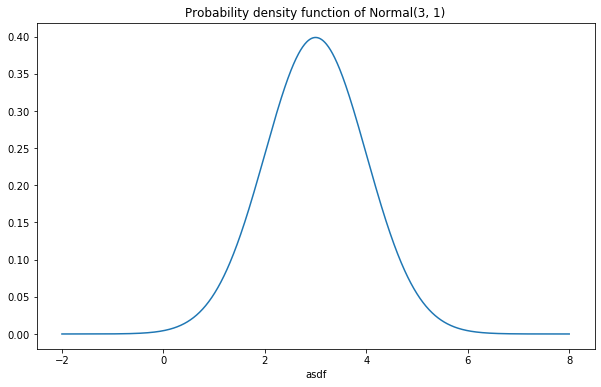

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
y_grid = np.linspace(-2, 8, num=1000) # choose some falues of y
ax.plot(y_grid, f(y_grid))           # plot f(y)
ax.set_title('Probability density function of Normal(3, 1)')
ax.set_xlabel('asdf')
plt.show()

In [4]:
np.random.seed(1234)

In [5]:
num_data = 5000 # number of observations
num_bins = 100  # number of bins

y_data = Y.rvs(num_data) # "data"

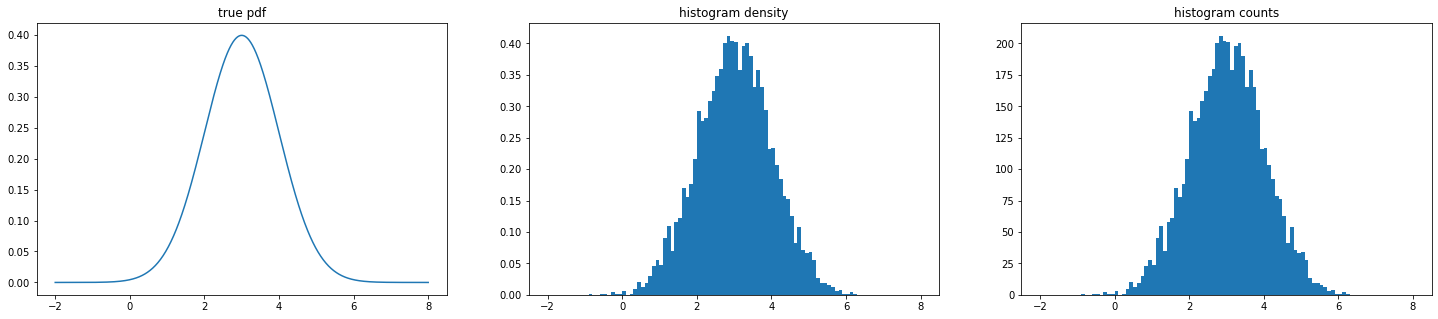

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

ax[0].plot(y_grid, f(y_grid))

bin_edges = np.linspace(-2, 8, num=num_bins+1)
fhat,   bins, patches = ax[1].hist(y_data, density=True,  bins=bin_edges) # density plot
counts, bins, patches = ax[2].hist(y_data, density=False, bins=bin_edges) # counts plot

ax[0].set_title('true pdf'); ax[1].set_title('histogram density'); ax[2].set_title('histogram counts')
plt.show()

- True pdf is unknown, but we can use the histogram
- Construct approximate continuous or discrete distributions

### Properties of Histograms

In [7]:
assert(len(counts) == num_bins) # check there are indeed `num_bins` of counts
assert(sum(counts) == num_data) # check total counts is equal to `num_data`

In [8]:
sum(fhat) # density does not sum to 1: i.e., cannot be a discrete distribution

10.000000000000007

**$\hat f(y)$ is a piecewise constant approximation of $f(y)$**

### Estimating Probabilities

- $\hat f$ approximates $f$ (continuous pdf)
- What can we compute from histogram counts and density values? 

In [9]:
normalize_fhat  = fhat/sum(fhat)          # heights1: just normalizing fhat
fhat_delta      = fhat*np.diff(bin_edges) # heights2: approximating integral with constant height per bin
bin_probability = counts/num_data         # heights3: probability of being in bin

In [10]:
assert(all(np.isclose(normalize_fhat, fhat_delta)))  # heights1 is equal to heights2
assert(all(np.isclose(fhat_delta, bin_probability))) # heights2 is equal to heights3

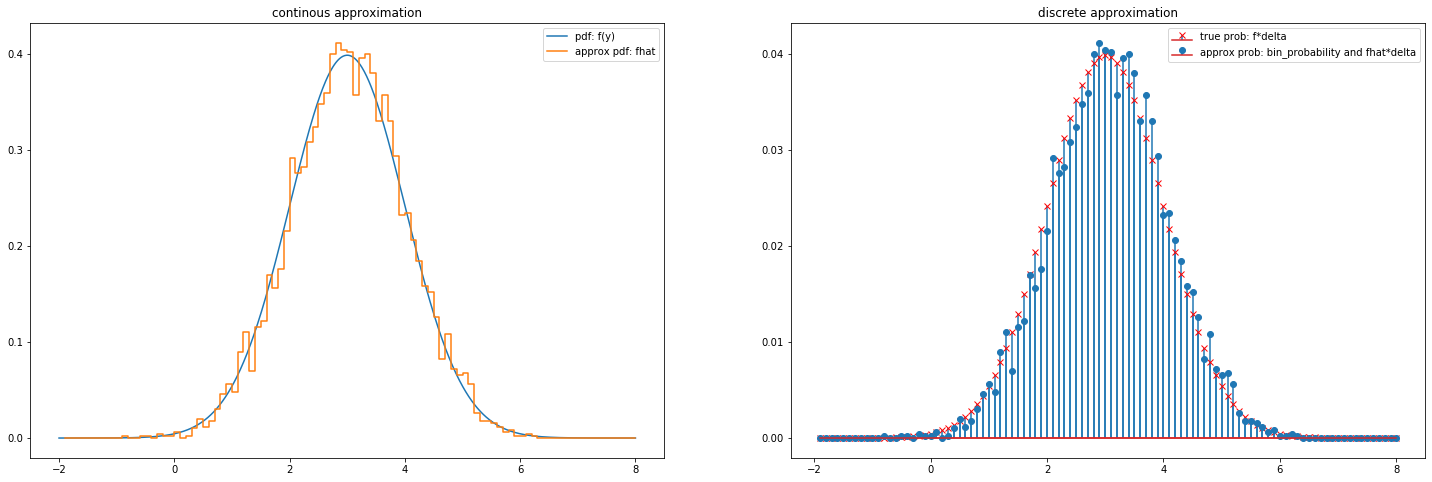

In [11]:
midpoints = bin_edges[:-1] + np.diff(bin_edges)

fig, ax = plt.subplots(1, 2, figsize=(25, 8))

ax[0].plot(y_grid, f(y_grid))                 # true density
ax[0].step(midpoints, fhat)                   # continuous approximation
ax[0].set_title('continous approximation')
ax[0].legend(['pdf: f(y)', 'approx pdf: fhat'])

ax[1].stem(midpoints, f(midpoints)*np.diff(bin_edges), # true probability mass at bin center
           use_line_collection=True, markerfmt='xr')
ax[1].stem(midpoints, bin_probability,                 # approximate probability mass at bin center 
           use_line_collection=True)
ax[1].set_title('discrete approximation')
ax[1].legend(['true prob: f*delta', 'approx prob: bin_probability and fhat*delta'])

plt.show()

### Checking Probabilities

- Check if approximations are valid probabilities

In [12]:
np.isclose(sum(fhat_delta), 1)

True

- `bin_probabilities` is a pmf
    $$ 1 = \sum_{b=1}^B \texttt{bin_probability}_b = \sum_{b=1}^B \hat p(x_b)$$

### Summary

- Any distribution can be approximated with a histogram

- Approximation can be continuous or discrete

- $\hat f(y)$ is piecewise constant approximation of continuous pdf (`density=True`)

- $\hat p(y_b)$ is approximate pmf where discrete values are at bin centers 

## Resampling from Data

- Recall our data $y_i$, where $i=1,2,\dots,n$

- How can we "sample from" our empirical distribution that our data represents

- Recall from 120B definition of CDF:
    $$ F(y) = P(Y\leq y) = \int_{-\infty}^y f(z)\, dz $$

In [13]:
def ecdf(data):
    y_ord = np.sort(data)
    n = y_ord.size
    Fhat = np.arange(1, n+1) / n
    
    return y_ord, Fhat

y_os, Fhat = ecdf(y_data)

### Empirical CDF 

- Sort data $D$ and let order statistic of $y_i$ be $y_{(i)}$

- We can approximate $F(y)$ with $\hat F(y)$ since
    $$\begin{aligned}
     \hat F(y_{(1)}) &= \hat P(Y\leq y_{(1)}) = 1/n\\
     \hat F(y_{(2)}) &= \hat P(Y\leq y_{(2)}) = 2/n\\
     &\vdots \\
     \hat F(y_{(n)}) &= \hat P(Y\leq y_{(n)}) = n/n = 1\\
    \end{aligned}$$

NameError: name 'F' is not defined

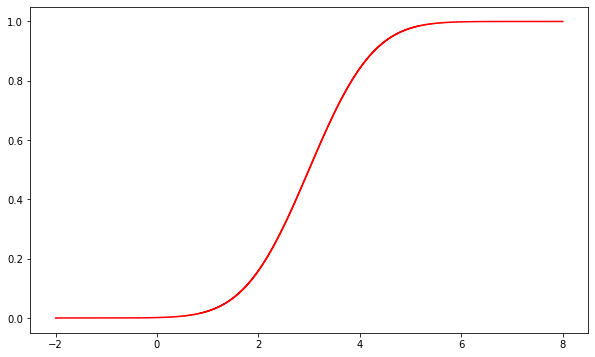

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
ax.step(y_os, F, '-')
ax.plot(y_os, [0.01]*len(y_os), '|', color='k', alpha=0.5)

ax.set_title('CDF')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

### Method of Distributions

- Simulate "new data" (bootstrap data) with one dataset: $D = \{y_1, y_2, \dots, y_n\}$?

- Can simulate $U\sim\text{Uniform}(0,1)$ and apply some operation $g(U) = Y\sim F(y)$?

- Assume invertible $F$ and non-decreasing $g$, we can show,
    $$g(u) = F^{-1}(u)$$

- $F$ is unknown, but we have $\hat F$ (revisit ECDF)

### Bootstrap Algorithm

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample $u_i$ from Uniform(0,1)
    1. $y_i^* = \hat F^{-1}(u_i)$, 
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

### Simpler Bootstrap Algorithm

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample a random integer $i\in [1, n]$
    1. $y^*_i = y_{(i)}$
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

![alt text](https://www.inferentialthinking.com/images/chapters/13/2/Bootstrap_25_0.png)

# [03-Command-Line-and-Data-collection](03-Command-Line-and-Data-collection.ipynb)

## Command Line Interface

- Text-based interaction with operating system (OS)
- Many data files are saved as text files: e.g., CSV, JSON, etc.
- Common utilities for navigating filesystem:  
    - `pwd`: list current directory
    - `ls`: list information about files and directories
    - `*`: wild-card character for matching names

In [ ]:
! pwd

In [ ]:
!ls -1 # list files and directories in current directory

In [ ]:
!ls -1 /home/jovyan/dual-repo/lecture-notes

- Common utilities for text files:
    - `cat`: prints content of a file
    - `head`: prints first few lines of a file
    - `sed`: (stream editor) changes texts
    - `paste`: pasts text files side-by-side
    - `cut`: processes columns in delimited text file
    - `find`: searches file system
    - `grep`: searches text given regular expression pattern
    - `sort`: sort a file line by line
    - `uniq`: keeps unique lines of a sorted text
    - etc.

### Viewing Help files

- Most commands have `--help` flag

In [ ]:
! cut --help

### Applying Sequence of Commands

- Pipe operator `|` sends output of previous command to the next  
    (similar to `%>%` in ggplot)

In [ ]:
# print string 'aa&bb=cc' then cut input at every '&' then return 2nd field
! echo 'aa&bb=cc&dd' | cut -d'&' -f2

In [ ]:
# print string 'aa&bb=cc' then cut input at every '=' then return 1st field
! echo 'aa&bb=cc&dd' | cut -d'=' -f1

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
ECDF(y_data)

### Running Multiple Commands (without passing output to next command)

- Multiple commands, separated by semi-colon, can be on one line

In [ ]:
!ls -1; echo "#######"; pwd

In [ ]:
%%bash
ls -1
echo "#######"
pwd

### Downloading Files

- `wget` is useful for downloading from URL locations
- Any output will be saved to file by default: html code, zip file, json file, etc.

- GET method is often used to specify content: e.g.,  
    https://www.google.com/maps/@?api=1&map_action=map&basemap=terrain&layer=bicycling

## Javascript Object Notation (JSON) format

- Usually plain text file with python dictionary-like formatting:  
    `{"key":"value"}`

- Can be nested:  
    `{"key0":{"key1":"value1", "key2":"value2"}}`

- Easily imported as Pandas dataframe

# [04-Exploratory-Data-Analysis-and-Visualization](04-Exploratory-Data-Analysis-and-Visualization)

## Principles of Good Visualization

- scale
- conditioning
- perception
- transformation
- context
- smoothing

### Kernel Smoothing

- Histograms can be used as estimate probability density functions

- Continuous density functions $f(x)$ are usually smooth
- However, histograms only give piecewise constant functions (see above)

- Kernel smoothing makes histograms smooth (bandwidth set by user)

# [05-Exploratory-Data-Analysis-and-Dimension-reduction](05-Exploratory-Data-Analysis-and-Dimension-reduction)

## Linear Independence and Unique Information

- Data can contain redundant information
- If a column is a linear combination of other columns, then there is redundant information
- Data can (closely) be represented as a product of lower dimensional matrices if (approximate) linear dependencies are present

- Example (Rank-1 matrix $R$): $R = uv^T$ where
    $$
    \small
    \begin{array}{|l|l|l|l|}\hline 
            & m_1 & m_2 & m_3 \\ \hline 
        u_1 & 1 & 0 & 2 \\ \hline 
        u_2 & 2 & 0 & 4 \\ \hline 
        u_3 & 3 & 0 & 6 \\ \hline 
    \end{array}
    =
    \begin{array}{|l|l|}\hline 
        u_1 & 1  \\ \hline 
        u_2 & 2  \\ \hline 
        u_3 & 3  \\ \hline 
    \end{array}
    \begin{array}{|l|l|l|}\hline 
            m_1 & m_2 & m_3 \\ \hline 
            1 & 0 & 2 \\ \hline 
    \end{array}
    $$

## Matrix Factorization

- Suppose $R \approx UV^T$ where $R\in\mathbb{R}^{n\times p}$, $U\in\mathbb{R}^{n\times k}$, and $V\in\mathbb{R}^{p\times k}$
- Matrix $R$ has rank of at most $\text{rank}(R) = r\leq \min(n,p)$ (linear algebra fact)
- Assume $k$ is chosen to be small relative to $r$: i.e., $k < r$

- Representing data with $U$ and $V$ achieves
    1. Concentration of information into rank-$k$ matrices: _dimensionality reduction_  
        e.g. try $k=1$ in movie recommender system example
    2. Separated matrix factors could be more interpretable

- In movie rating decomposition,  
    1. $U$: user affinities to $k$ characteristics
    2. $V$: movies affinties to $k$ characteristics

- Matrix factorization may not unique:  
    $R \approx UV^T = (a\cdot U)(a^{-1}\cdot V^T) = \tilde U \tilde V^T$

- Many other types of factorizations exist:  
    1. Principal Component Analysis (PCA): $R = QY$  
        $Q$ is orthonormal, $Y$ is data in rotated coordinate space
    2. Independent Component Analysis (ICA): $R = WY$  
        $W$ is independent components, $Y$ contains coefficients  
    3. Singular Value Decomposition (SVD): $R = U\Sigma V^T$  
        $U$ and $V$ are orthonormal and $\Sigma$ is a diagonal matrix of sigular values 
    3. Non-negative Matrix Factorization (NMF): $R \approx WH$  
        $W$ and $H$ are matrices with non-negative values  
        $R$ must be a non-negative matrix

# [06-Movie-Recommendation-System](06-Movie-Recommendation-System.ipynb)

## Computing $U$ and $V$

- How are $U$ and $V$ computed?

- Find $U$ and $V$ that fit the data well (minimize sum of squared error)
\begin{align*}
\min_{U,V} \|R - UV^T\|_F^2
\end{align*}

- Process of finding $U$ and $V$ to minimize is called optimization

## Optimization: Direction of Function Decrease

- Choice of loss function defines some score: e.g. likelihood function, vector norm, BIC, MSE, etc.

- Example: minimizing Frobenius loss: $\|\cdot\|_F^2$

- Negative of function derivative (or gradient) points in direction of function decrease

- Continually make improvements (choose $x$ that decrease loss-function) until convergence

## Choosing $k$

- As $k$ increases (up to $r$), $\|R - \hat R\|_F^2$ decreases (why?)
- $k$ is often called the tuning parameter
- Try different $k$ in recommendation system example